# **CIS 520: Machine Learning, Fall 2020**
# **Week 6, Worksheet 1**
## **Boosting**


- **Content Creators:** Siyun Hu
- **Content Reviewers:** Michael Zhou, Shaozhe Lyu
- **Acknowledgements:** This notebook contains an excerpt from [Hands-on Machine Learning with Scikit-Learn and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/) by Aurélien Géron. The content is available on [Github](https://github.com/ageron/handson-ml).



The objective of this notebook is to walk you through examples of various kinds of boosting algorithms and compare their performance on MNIST dataset.

# Setup

Import part of the packages and data we used in this notebook. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [ ]:
# import MNIST from sklearn
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [ ]:
# split the MNIST data into train, valiation and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)

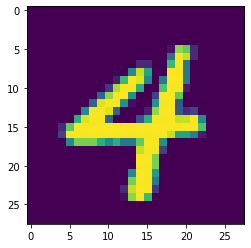

In [ ]:
# visualize the first element in X_train
plt.imshow(X_train[0].reshape(28,28))

In [ ]:
y_train[0]

4

# AdaBoost

The first boosting algorithm we will go through is **AdaBoost**. You can see the [sklearn documentation of AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html). The code below shows how we initiate a simple AdaBoost classifier and train it on our MNIST dataset. 

In [ ]:
# create an AdaBoost classifier
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
# calculate the accuracy score on train set
ada_clf.score(X_train, y_train)

0.7937

In [ ]:
# calculate the accuracy score on test set
accuracy_score(y_test, ada_clf.predict(X_test))

0.7851

We find the accuracies on the train set and test set are quite close in the above example. Therefore, it's quite fair for us to say, there is no over-fitting problem. But what if there is an obvious gap between performance on the validation set and training set? What kind of method can we use to prevent over-fitting? *(Hint: Many hyper-parameters could control model complexity)*

The hyper-parameters we try here are not optimal. You could tune it by yourself to see the effect of different hyper-parameters. Below is an example code of how we tune max_depth.

Please notice that it is quite **time-consuming** to run below cell. If you want to run this code by yourself, you could choose depths = [1,3,5] instead of [1,3,5,8] to accelerate the process.

In [ ]:
# create a list of all possible depth values
depths = [1,3,5,8]
models = []
train_accuracy = []
val_accuracy = []
# create a list of models 
for depth in depths:
  model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=depth), n_estimators=100,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
  model.fit(X_train, y_train)
  models.append(model)
  # evaluate model performance
  train_score = model.score(X_train, y_train)
  val_score = model.score(X_val, y_val)
  train_accuracy.append(train_score)
  val_accuracy.append(val_score)
  print('Depth: {} Train Accuracy: {} Test Accuracy: {}'.format(depth, train_score, val_score))

Depth: 1 Train Accuracy: 0.79236 Test Accuracy: 0.7883
Depth: 3 Train Accuracy: 0.8957 Test Accuracy: 0.8895
Depth: 5 Train Accuracy: 0.93926 Test Accuracy: 0.9087
Depth: 8 Train Accuracy: 0.99032 Test Accuracy: 0.9465


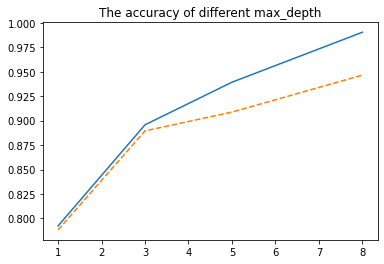

In [ ]:
# plot the train and test accuracy
plt.plot(depths, train_accuracy, '-')
plt.plot(depths, val_accuracy, '--')
plt.title('The accuracy of different max_depth')
plt.show()

According to this figure, which one is the optimal max_depth? 

Once you get the answer, you could calculate model performance on the test set using the optimal model we found in the previous step.

In [ ]:
best_model = models[np.argmax(val_accuracy)]
best_model.score(X_test, y_test)

0.9423

Another very powerful property of tree-based algorithms is that it is more **explainable** compared with other algorithms. We can display feature importance using the following syntax:

In [ ]:
models[0].feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.  ,
       0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.01, 0.01, 0.  ,
       0.01, 0.01, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

# Gradient Boosting

Gradient Boosting is another powerful boosting algorithm. To learn more about the difference between AdaBoost and Gradient Boost, refer to the [lecture slide](https://www.seas.upenn.edu/~cis520/lectures/12_boosting.pdf).
Here is the [sklearn documentation of Gradient Boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
accuracy_score(y_test, gbrt.predict(X_test))

0.7186

## Gradient Boosting with Early Stopping

**Early stopping** is one of the important methods we use to prevent over-fitting. Below is the example code of how we perform Gradient Boosting with early stopping.

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=2, subsample = 0.5, tol = 0.01, n_estimators=10, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=0.5, tol=0.01,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
# find the optimal n_estimators - have lowest error on validation set
errors = [log_loss(y_val, y_pred)
          for y_pred in gbrt.staged_predict_proba(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingClassifier(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
min_error = np.min(errors)
min_error

1.1314577911569812

Since the number of estimators we tried here is only 10, it does not satisfy the requirement of early stopping. However, you can try a larger value for n_estimators to see the impact of early stopping here.

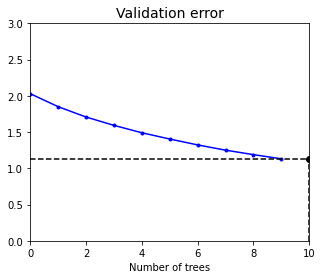

In [ ]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 10], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.axis([0, 10, 0, 3])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)
plt.show()

## XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. See [XGBoost documentation](https://xgboost.readthedocs.io/en/latest/) here.

In [ ]:
# import xgboost
try:
    import xgboost 
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

Since XGBoost does not directly support multi-classification (you can implement your own customized objective class to achieve this), we use digit 1 and 2 to build a binary data set.

In [ ]:
# filter the original data set
indices = np.logical_or(mnist.target == 1, mnist.target == 2)
small_data = mnist.data[indices]
small_label = mnist.target[indices]
# split the filtered data set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    small_data, small_label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.2, random_state=42)

In [ ]:
if xgboost is not None: 
    xgb = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100,
                              silent=True, objective='binary:logistic', booster='gbtree')
    xgb.fit(X_train, y_train)
    y_pred = xgb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", accuracy)

Test Accuracy: 0.9949562878278413


Early stopping in XGBoost is much easier. There is a parameter called early_stopping_rounds. The model will train until the validation score stops improving. Validation error needs to decrease at least every early_stopping_rounds to continue training. 

In [ ]:
if xgboost is not None:  
    xgb = xgboost.XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100,
                              silent=True, objective='binary:logistic', booster='gbtree')
    xgb.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred)
    print("Validation Accuracy:", val_accuracy)

[0]	validation_0-error:0.026061
Will train until validation_0-error hasn't improved in 2 rounds.
[1]	validation_0-error:0.02396
[2]	validation_0-error:0.020177
[3]	validation_0-error:0.019756
[4]	validation_0-error:0.019336
[5]	validation_0-error:0.018495
[6]	validation_0-error:0.019336
[7]	validation_0-error:0.018495
Stopping. Best iteration:
[5]	validation_0-error:0.018495

Validation Accuracy: 0.9815048339638504


## Additional Material

If you are interested in Boosting algorithm, you could read additional material here [LightGBM - Paper](https://papers.nips.cc/paper/6907-lightgbm-a-highly-efficient-gradient-boosting-decision-tree.pdf), and [LightGBM - Documentation](https://lightgbm.readthedocs.io/en/latest/). You can also refer to [CatBoost - Paper](https://arxiv.org/abs/1706.09516) and [CatBoost - Documentation](https://catboost.ai/docs/concepts/about.html). Hope you enjoy this worksheet.